In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('/mnt/qdata/raheppt1/data/tumorvolume/processed/petct/export/petct_all_predictions.csv')

In [3]:
df

,Unnamed: 0,key,project,dice_background,dice_lesion,volume_manual,volume_prediction,uptake_mean_manual,uptake_std_manual,uptake_median_manual,uptake_min_manual,uptake_max_manual,num_lesions_manual,uptake_mean_prediction,uptake_std_prediction,uptake_median_prediction,uptake_min_prediction,uptake_max_prediction,num_lesions_prediction
0,0,004bc0db32,TUE0001PETBC,0.999862,0.882419,162192.0,157248.0,2.7360443178455163,0.9146535916346337,2.7360443178455163,1.5856934,7.4316406,6,2.7702281984508548,0.9131016765768997,2.7702281984508548,1.373291,7.4316406,6
1,1,00550cd931,TUE0001PETBC,0.999907,0.419262,38616.0,11472.0,2.939742330737259,1.1073402065515383,2.939742330737259,1.6137695,11.162109,7,3.9682900656217313,1.4975697803486734,3.9682900656217313,1.7236328,11.162109,7
2,2,005e396f66,TUE1003MELPE,0.999889,0.744465,100932.0,87144.0,5.543559494263465,2.683761723000406,5.543559494263465,2.027588,26.386719,24,4.904846611642798,2.5809828150401377,4.904846611642798,1.9238281,26.386719,14
3,3,018140f8ad,TUE0001PETBC,0.999905,0.846273,94776.0,99204.0,3.39518830914472,1.8601483754931525,3.39518830914472,1.7590332,15.166016,8,3.326889855751784,1.8535161983115847,3.326889855751784,0.9881592,15.166016,10
4,4,025f1fc28c,TUE0001PETBC,0.999951,0.903436,85632.0,72936.0,6.669424287941424,4.414103789201544,6.669424287941424,1.4587402,18.427734,6,7.458066618336624,4.322863557105188,7.458066618336624,1.7089844,18.427734,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,fe697c7e28,TUE1003MELPE,0.999983,0.823806,13692.0,16956.0,5.341651374890447,2.2085268218355867,5.341651374890447,2.4035645,16.132812,2,5.383241689888535,3.325070636251012,5.383241689888535,2.055664,33.398438,8
495,495,ff0b57bf18,TUE1003MELPE,0.999959,0.594821,9372.0,22140.0,5.500810259282971,2.455177780178697,5.500810259282971,2.5195312,13.896484,1,4.628383299457995,2.1849746041516567,4.628383299457995,1.6943359,13.896484,13
496,496,ff0b9c90ef,TUE0001PETBC,0.997044,0.572308,1500828.0,647064.0,4.953672073015695,3.601794498881835,4.953672073015695,1.3085938,34.960938,217,6.879435805422648,4.055749376646195,6.879435805422648,1.1071777,34.960938,96
497,497,ffa5ce5164,TUE0001PETBC,0.999942,0.869993,61992.0,59940.0,4.8353461938637246,2.53108954968145,4.8353461938637246,1.4538574,11.6015625,6,4.929308214464465,2.5188920596716198,4.929308214464465,1.4807129,11.6015625,7


Text(0.5, 1.0, 'dice score histogram')

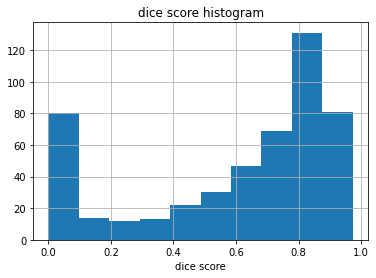

In [4]:
df['dice_lesion'].hist()
plt.xlabel('dice score')
plt.title('dice score histogram')

Text(0, 0.5, 'log tumor volume prediction')

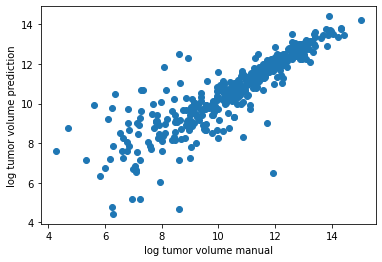

In [5]:
plt.scatter(np.log(df['volume_manual']), np.log(df['volume_prediction']))
plt.xlabel('log tumor volume manual')
plt.ylabel('log tumor volume prediction')

In [6]:
df[['uptake_mean_manual', 'uptake_mean_prediction']]

,uptake_mean_manual,uptake_mean_prediction
0,2.7360443178455163,2.7702281984508548
1,2.939742330737259,3.9682900656217313
2,5.543559494263465,4.904846611642798
3,3.39518830914472,3.326889855751784
4,6.669424287941424,7.458066618336624
...,...,...
494,5.341651374890447,5.383241689888535
495,5.500810259282971,4.628383299457995
496,4.953672073015695,6.879435805422648
497,4.8353461938637246,4.929308214464465


In [33]:
df_organs = pd.read_feather('/mnt/qdata/raheppt1/data/tumorvolume/processed/ctorgans/ctorgans_petct.feather')

In [35]:
df_organs.to_csv('/mnt/qdata/raheppt1/data/tumorvolume/processed/ctorgans/ctorgans_petct.csv')

In [38]:
tmp = pd.read_csv('/mnt/qdata/raheppt1/data/tumorvolume/processed/petct/export/petct_all_predictions.csv')

In [39]:
tmp.to_feather('/mnt/qdata/raheppt1/data/tumorvolume/processed/petct/export/petct_all_predictions.feather')